<a href="https://colab.research.google.com/github/kashifkamran639/Airbnb-NYC-2019/blob/main/kashif_kamran_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> 1. Defining Problem Statement
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

 <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

 <u> Explore and analyze the data to discover key understandings (not limited to these) such as :</u>

* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# <b>2. Lets Importing Required Libraries and Mount Drive and dataset

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Dataset
bnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone-1/Airbnb NYC 2019.csv')

# <b> 3. Reading and Exploring Data</b>

* Lets dive into the data, we will see top 5 rows, bottom 5 rows, shape, size and Geometry of our data.

In [ ]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
bnb.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [ ]:
bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [51]:
# let's look at the statistical aspects of the dataframes
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [99]:
#Copying the original dataset for cleaning operation 
df_nyc = bnb.copy() 

# **5. Data Cleaning**
using `describe` to get a summary statistics of the numeric data, We can see that the data need cleanning, We Observe that there are some outliers for **price and minimum_nights**. Other columns such as **number_of_reviews and calculated_host_listings_count** are skewed toward right, so we need to transfer them into categorical variables.



In [100]:
# Let's check for the Null Values 
Total = df_nyc.isnull().sum().sort_values(ascending=False)
Percentage = (df_nyc.isnull().sum()/df_nyc.isnull().count()*100).sort_values(ascending=False)
missing_value = pd.concat([Total,Percentage], axis=1, keys=['Total','Percentage']) 
missing_value

,Total,Percentage
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


As we can see there are some Null Values in **host_name**, **name** , **last_review** and **reviews_per_month** 

<u/>**host_name**& **name**</u> : Missing Values are 21 & 16 both are less than 0.5% so will simple drop the rows corresponding to the missing values in those column.

<u/>**last_review** and **reviews_per_month**</u> : we found Null Values are for those properties which doesn't have any reviews. so will replace all the Null values of review_per_month with zero ('0') and drop the **last_review** as column has very high Null Values and negligible relevence with our problem set for EDA.

In [101]:
df_nyc.drop(['last_review'], axis=1,inplace=True)
df_nyc.fillna({'reviews_per_month':0}, inplace=True)

In [102]:
df_nyc=df_nyc.dropna(subset=['name', 'host_name'])
#better to double check
df_nyc.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [103]:
df_nyc[df_nyc.price==0].shape

(11, 15)

We can clearly see the total of eleven entries need to be drop whose price is 0 so going forward excluding those entries having price = 0

In [104]:
df = df_nyc[df_nyc['price'] !=0]

## Handing Outliners



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54043da890>,
      dtype=object)

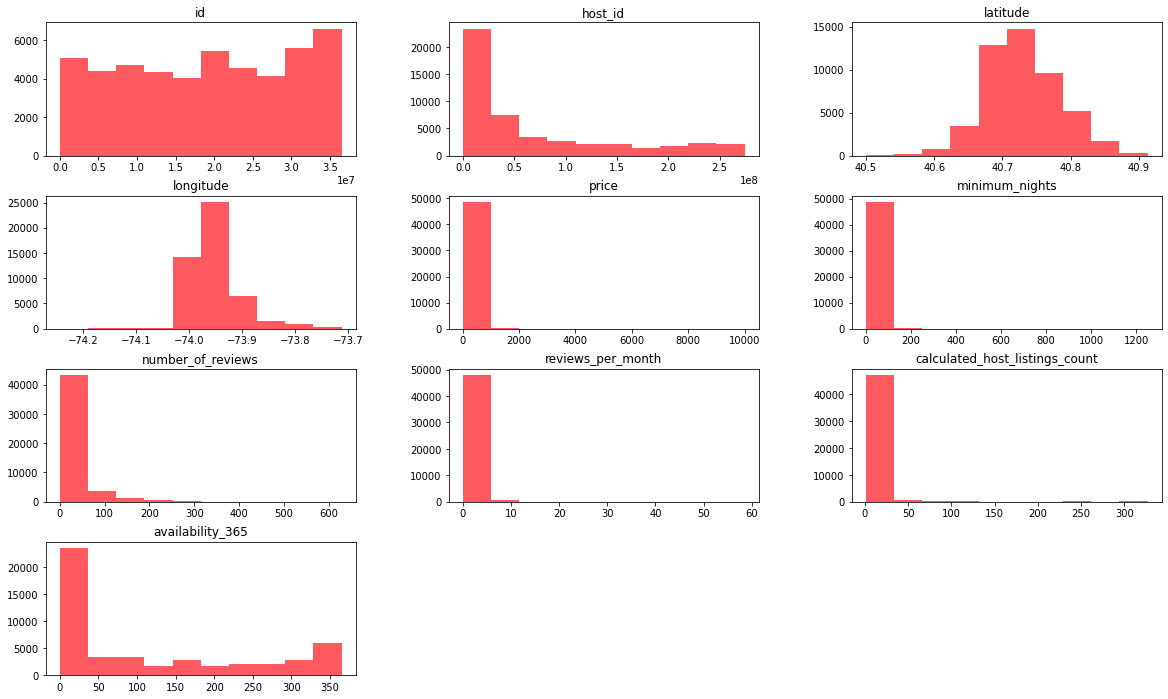

In [108]:
df.hist(figsize=(20,12), grid = False, color = '#FF5A5F')

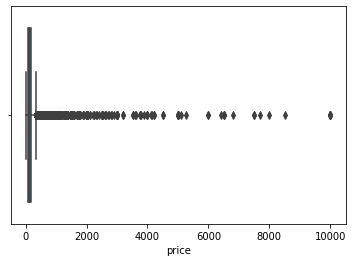

In [106]:
sns.boxplot(x=df['price'])

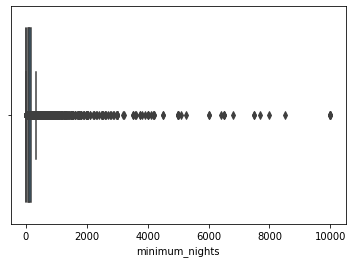

In [105]:
sns.boxplot(x=df['minimum_nights'])

In [92]:
df['z_price'] = np.abs(stats.zscore(df['price']))
df['z_min_nights'] = np.abs(stats.zscore(df['minimum_nights']))

In [93]:
# remove z scroe that are greater than 3

df = df[(df['z_price'] < 3)]
df = df[(df['z_min_nights'] < 3)]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48149 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48149 non-null  int64  
 1   name                            48149 non-null  object 
 2   host_id                         48149 non-null  int64  
 3   host_name                       48149 non-null  object 
 4   neighbourhood_group             48149 non-null  object 
 5   neighbourhood                   48149 non-null  object 
 6   latitude                        48149 non-null  float64
 7   longitude                       48149 non-null  float64
 8   room_type                       48149 non-null  object 
 9   price                           48149 non-null  int64  
 10  minimum_nights                  48149 non-null  int64  
 11  number_of_reviews               48149 non-null  int64  
 12  reviews_per_month               

# <b> 4. Identifying the relation and dependencies in Data</b>

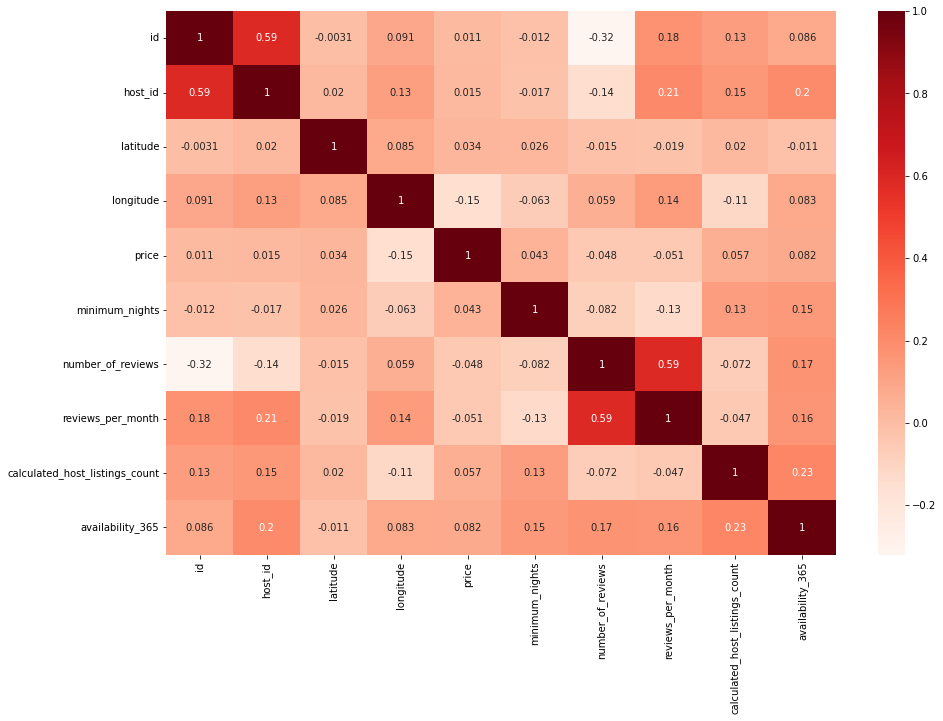

In [110]:
#let's analysize if there is any numerical corelation.
plt.figure(figsize=(15,10))
abnb_corr = df.corr()
heatmap=sns.heatmap(abnb_corr ,cbar=True,annot=True, cmap="Reds")

We did not found any pleasing correlation between the numerical variables except number of reviews and reviews per month.